In [7]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_series = pd.read_parquet('data/train_series.parquet)
train_events = pd.read_csv('data/train_events.csv')


In [2]:
train_series.head()

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.6367,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.6368,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.6370,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.6368,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.6368,0.0215


In [3]:
train_events.head()


,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


In [4]:
train_events = train_events.sort_values(by=['series_id', 'timestamp'])


In [13]:
def is_awake(row, events_df):
    # Get all events for this series_id
    events = events_df[events_df['series_id'] == row['series_id']]
    # Find events where the series step is between onset (sleep) and wakeup (awake) events
    for i in range(len(events) - 1):
        if not events.iloc[i].get('event') or not events.iloc[i+1].get('event'):
            continue
        if events.iloc[i]['event'] == 'onset' and events.iloc[i+1]['event'] == 'wakeup':
            if events.iloc[i]['step'] <= row['step'] < events.iloc[i+1]['step']:
                return False  # The person is asleep between onset and wakeup
    return True  # If not found between sleep events, the person is awake

In [ ]:
len(train_series)

127946340

In [14]:
# get only series id 038441c925bb
train_series_03 = train_series[train_series['series_id'] == '038441c925bb']
events_for_series_03 = train_events[train_events['series_id'] == '038441c925bb']
train_series_03['awake'] = train_series_03.apply(is_awake, axis=1, events_df=train_series_03)


In [ ]:
train_series.describe()

,step,anglez,enmo
count,1.279463e+08,1.279463e+08,1.279463e+08
mean,2.548048e+05,-8.810453e+00,4.131503e-02
std,1.778930e+05,3.552188e+01,1.018289e-01
min,0.000000e+00,-9.000000e+01,0.000000e+00
25%,1.158120e+05,-3.185890e+01,1.300000e-03
50%,2.345190e+05,-9.597900e+00,1.720000e-02
75%,3.571960e+05,1.130020e+01,4.370000e-02
max,1.433879e+06,9.000000e+01,1.143370e+01


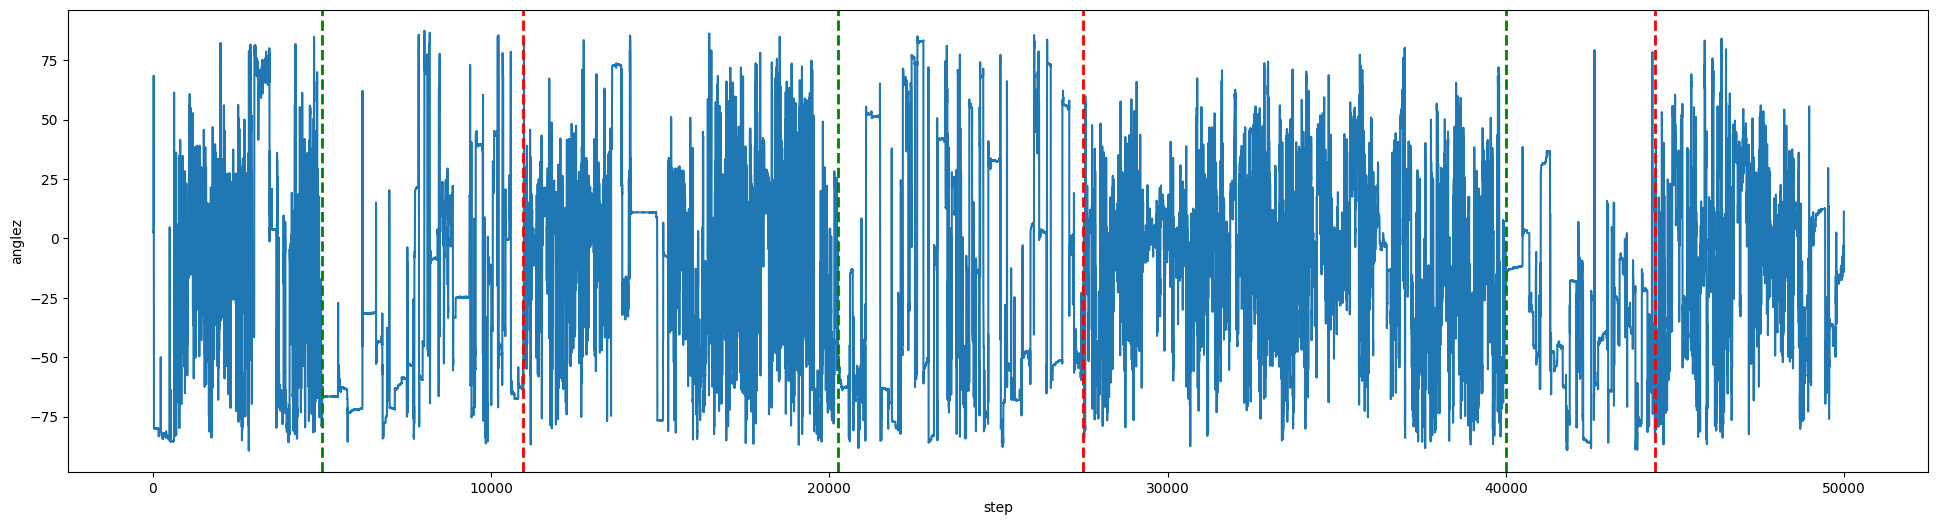

In [12]:
# Plot anglez vs time using seaborn
plot_train_data = train_series_03.head(50_000)
max_step = plot_train_data['step'].max()

plt.figure(figsize=(24,6))
sns.lineplot(x='step', y='anglez', data=plot_train_data)
for _, row in events_for_series_03.iterrows():
    if not row['step']:
        continue
    if row['step'] > max_step:
        continue
    if row['event'] == 'onset':
        plt.axvline(x=row['step'], color='green', linestyle='--', lw=2)
        # plt.text(row['step'], plt.ylim()[1], 'onset', color='green', ha='right', va='bottom')
    elif row['event'] == 'wakeup':
        plt.axvline(x=row['step'], color='red', linestyle='--', lw=2)
        # plt.text(row['step'], plt.ylim()[1], 'wakeup', color='red', ha='right', va='bottom')

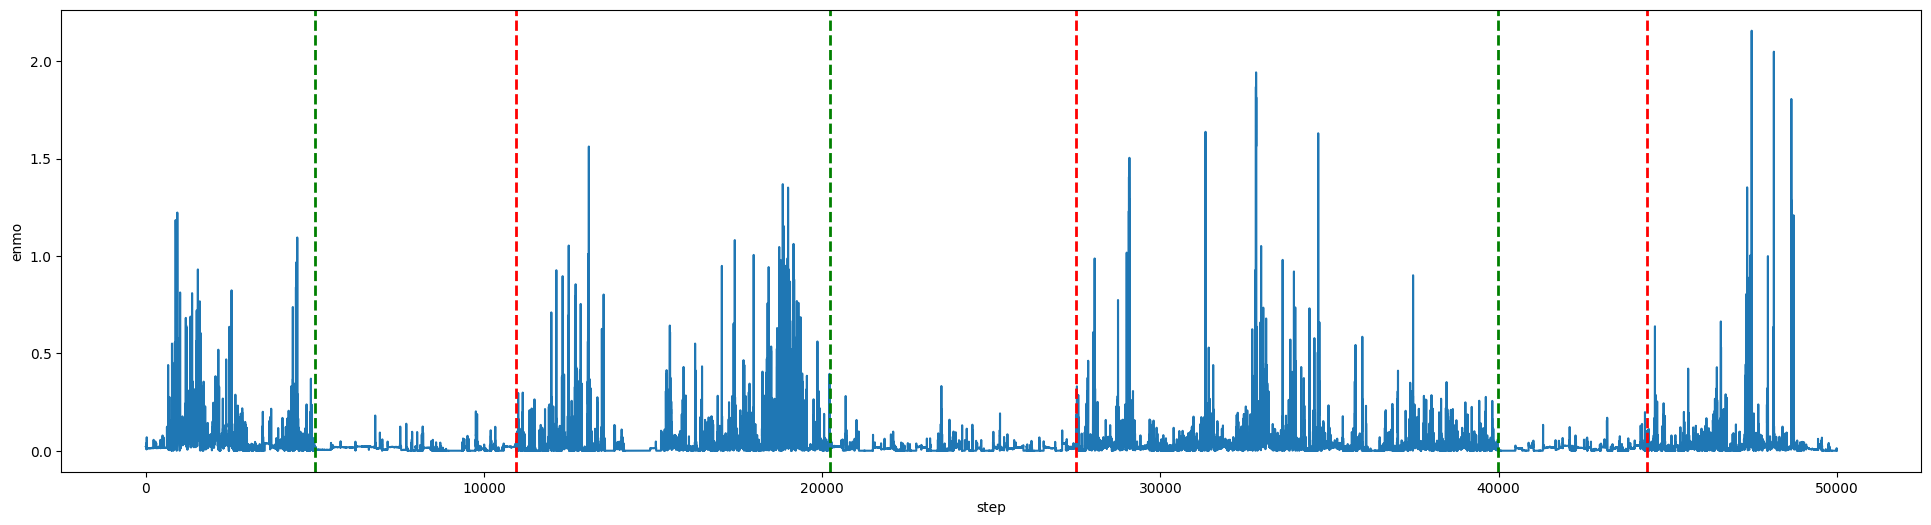

In [ ]:
# Plot anglez vs time using seaborn
plot_train_data = train_series_03.head(50_000)
max_step = plot_train_data['step'].max()

plt.figure(figsize=(24,6))
sns.lineplot(x='step', y='enmo', data=plot_train_data)
for _, row in events_for_series_03.iterrows():
    if not row['step']:
        continue
    if row['step'] > max_step:
        continue
    if row['event'] == 'onset':
        plt.axvline(x=row['step'], color='green', linestyle='--', lw=2)
        # plt.text(row['step'], plt.ylim()[1], 'onset', color='green', ha='right', va='bottom')
    elif row['event'] == 'wakeup':
        plt.axvline(x=row['step'], color='red', linestyle='--', lw=2)
        # plt.text(row['step'], plt.ylim()[1], 'wakeup', color='red', ha='right', va='bottom')

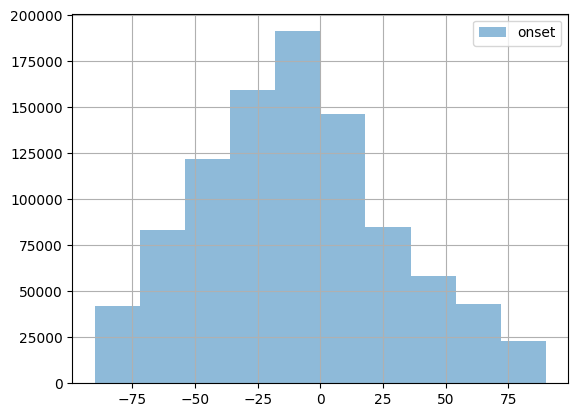

In [ ]:
onset_data = train_series[train_series.step.isin(train_events[train_events.event == 'onset'].step)]
wakeup_data = train_series[train_series.step.isin(train_events[train_events.event == 'wakeup'].step)]

onset_data.anglez.hist(alpha=0.5, label='onset')

plt.legend()
